In [15]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Objectives:
- What is the most important factor in determining survival of the Titanic incident?
- "Women and children first." Was this the case?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- Add one other observation that you have noted in the dataset

<Axes: >

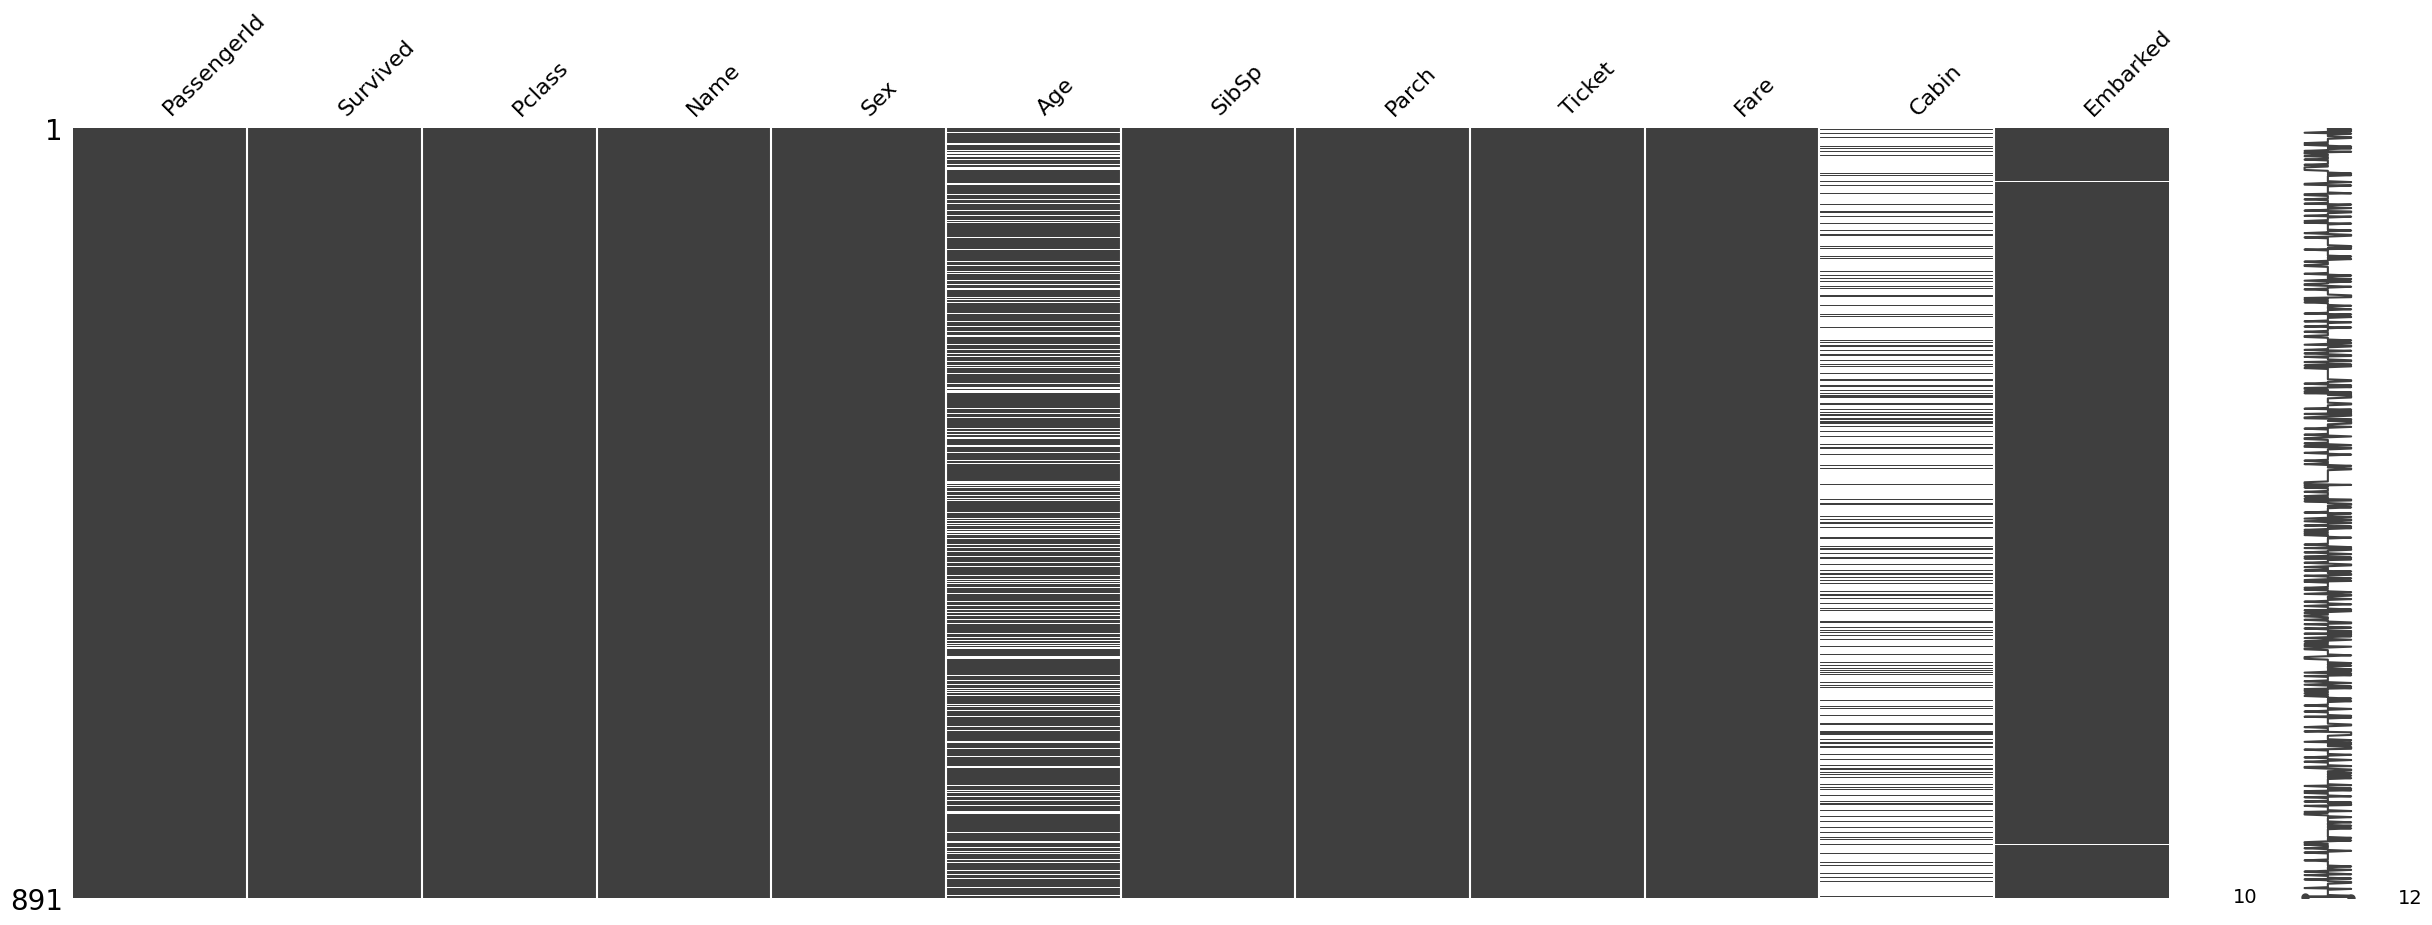

In [16]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:12]

missingno.matrix(df, figsize = (30,10))

The columns with a large number of missing values are: Age and Cabin. 

Cabin is unlikely to be useful in my analysis as a large proportion of the data is missing. I will drop this column to reduce the size of my dataset.

Age is important to my analysis as it may affect a passenger's chance of survival. What could be the reason for Ages being missing? Are missing ages more prominent in a particular gender group or linked to survival?


In [17]:
#cleaning my data of columns I will not be using
df = df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#group by gender
groupby_sex = df.groupby('Sex').size()
print(groupby_sex)
#put into age groups

Sex
female    314
male      577
dtype: int64


To consider whether women and children were given priority, I have grouped the data by Sex to get an idea of the proportion of men and women on the ship.
I can see that there were significantly more male than female passengers aboard the titanic.

<Axes: ylabel='Sex'>

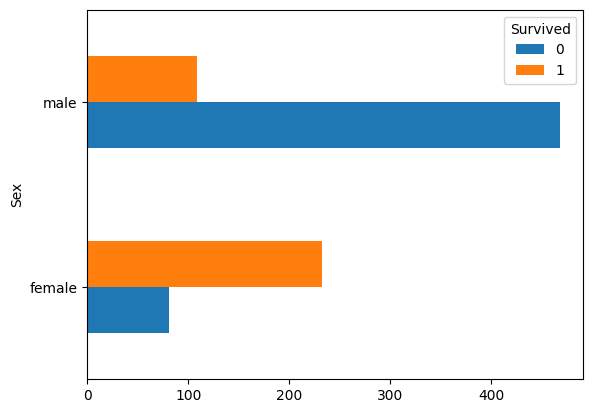

In [19]:
gender_survived = df.groupby(['Sex', 'Survived']).size()
gender_survived.head()
df.groupby(['Sex', 'Survived']).size().unstack().plot.barh()

#plt.bar()
#plt.show()


Despite the fact that there were more men than women aboard the Titanic, significantly more women survived (approx 250) than men (approx 100). As a higher proportion of the female population survived compared to the proportion of the male population, this data suggests that women were given priority on lifeboats during the Titanic incident.

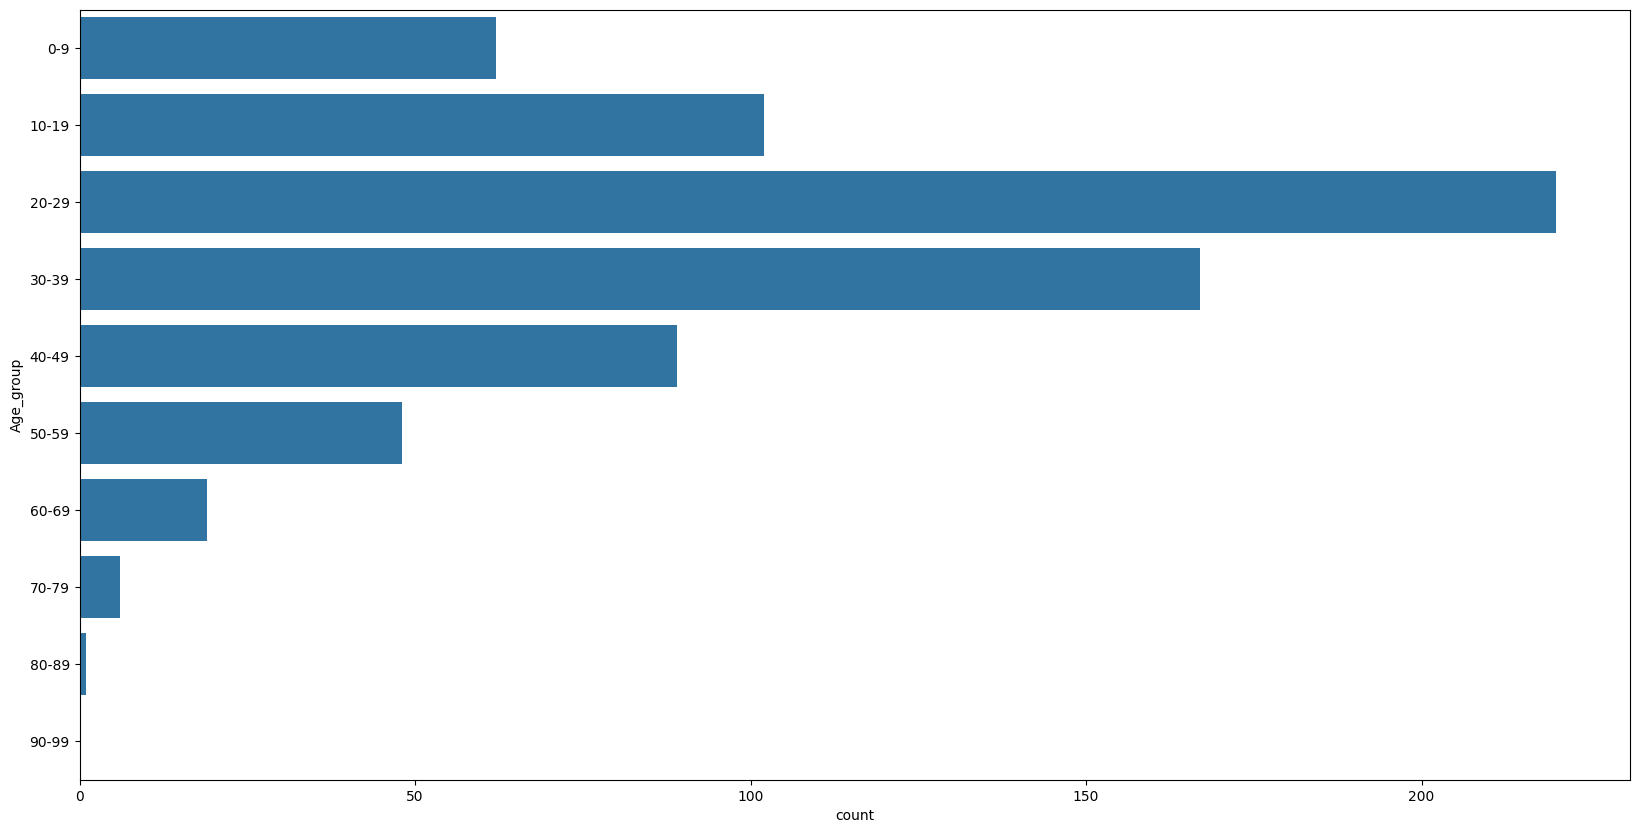

In [20]:
#we can visualize how many passengers of each age group were present:
df_ages = df
df_ages['Age_group'] = pd.cut(df_ages['Age'], [0,9,19,29,39,49,59,69,79,89,99], 
                   labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_ages['Age_group'], data=df_ages);

Next, I wanted to get an idea of how many members of each age group were present on the Titanic.

C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\3924447907.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ages_survived = df.groupby(['Age_group', 'Survived']).size()#.to_frame('count')


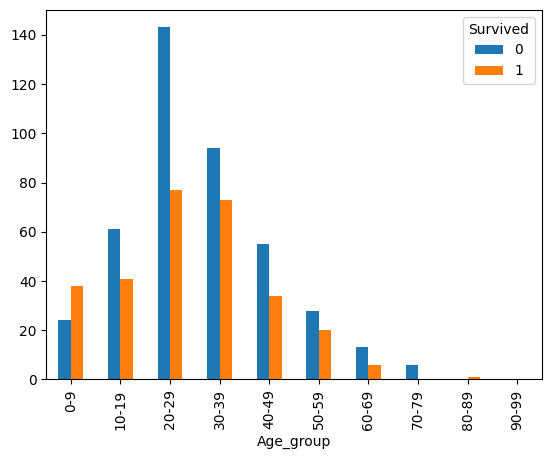

In [21]:
'''
df_pivot = pd.pivot_table(gender_ages_survived,
                         values="count",
                         index="Age_group",
                         columns="Survived",
                         aggfunc=np.mean)

df_pivot.plot.bar()
'''


#df_ages.head()
ages_survived = df.groupby(['Age_group', 'Survived']).size()#.to_frame('count')
#ages_survived['survive_size'] = df.groupby(['Age_group', 'Survived']).size()
#ages_survived.head()

ax = ages_survived.unstack().plot.bar()

#subplot count of df_ages['Age_group'] (Total passengers of each age group)

The number of surviving children in the youngest age group outweighted the number that did not survive. The age group of 20-29 had the largest population, as well as the largest proportion of non-survivors. This may indicate that this large population gave piority to the younger and older age groups, as the number of survivors is only approximately a third of the entire 20-29 population. 

Looking at the second figure, despite the 10-19 age group being significantly larger (almost double) than the 0-9 age group, the number of survivors in both categories is very similar, meaning the 10-19 category incurred a greater loss.

In summary, As the proportion of survivors in the 20-29 year old category is significantly lower than any other age group, and a larger proportion of the youngest age group of 0-9 survived, a passenger's age is a likely factor in their odds of surviving the incident.

In [23]:
#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(221)
#plt.plot(ages_survived.unstack())

C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\316932051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_ages_survived = df.groupby(['Age_group', 'Sex', 'Survived']).size().to_frame('count')
C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\316932051.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = pd.pivot_table(gender_ages_survived,
C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\316932051.py:9: FutureWarning: The provided callable <function mean at 0x0000026B64B78220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavio

<Axes: xlabel='Survived'>

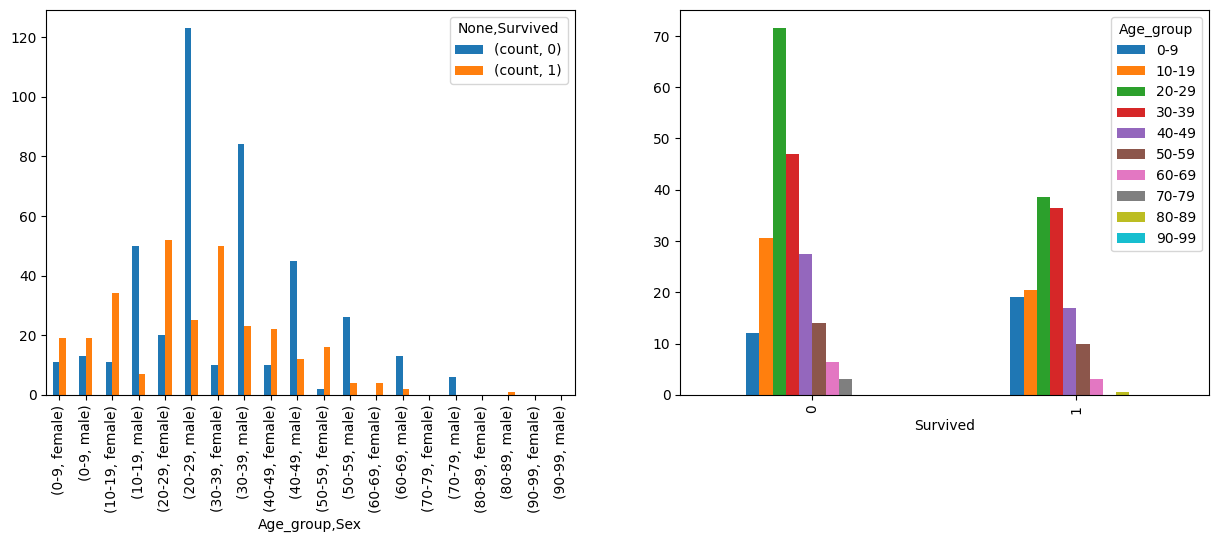

In [33]:
gender_ages_survived = df.groupby(['Age_group', 'Sex', 'Survived']).size().to_frame('count')
gender_ages_survived.head()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
#first subplot contains the total population in each class, making this transparent to overlap the separated populations

gender_ages_survived.unstack().plot.bar(ax=axes[0])
#
df_pivot = pd.pivot_table(gender_ages_survived,
                         values="count",
                         index="Survived",
                         columns="Age_group",
                         aggfunc=np.mean)

df_pivot.plot.bar(ax=axes[1])

C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\3910601022.py:3: FutureWarning: The provided callable <function mean at 0x0000026B64B78220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = pd.pivot_table(unstacked_df,


<Axes: xlabel='Age_group'>

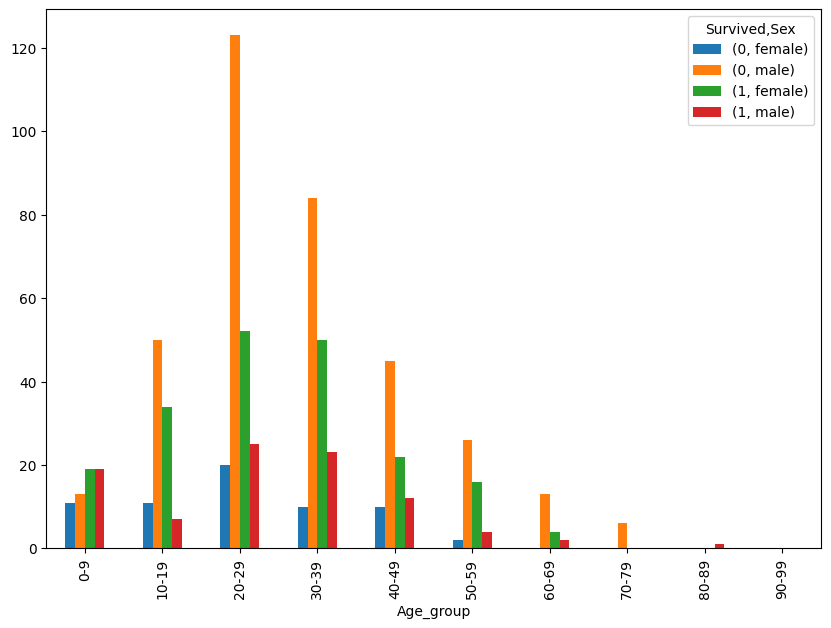

In [41]:
unstacked_df = gender_ages_survived.unstack()

df_pivot = pd.pivot_table(unstacked_df,
                          observed=False,
                         values="count",
                         index="Age_group",
                         columns="Sex",
                         aggfunc=np.mean)

df_pivot.plot.bar(figsize=(10,7))

#gender_ages_survived.head()

What is the most important factor affecting survival?

In this visualization, I separated the sexes in each age group to consider the impact of a passenger's age vs their sex.

In the 0-9 age group, the number of survivors is equal among both sexes; this suggests that passengers of the 0-9 age group were less impacted by their sex compared to older groups of passengers, and therefore their age is the most significant factor in their survival. In addition, it is the only age group where the total number of survivors was greater than the number of non-survivors.

As you traverse the graph to the older age groups, it is easy to identify that in every age group, the number of male passengers who survived was much lower than the number of female passengers who survived (red and green bars respectively) which indicates that women were given priority overall over men. the proportions of men in each category who survived was trivial compared to the number who did not, meanwhile the proportion of female passengers in each age group who survived greatly outweighed the proportion who did not.

In summary, across all the age groups of people on the Titanic, being female appears to be the most significant factor affecting a passenger's survival, however this does not affect children who appeared to be prioritized despite their sex.




C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\1922129073.py:17: FutureWarning: The provided callable <function mean at 0x0000026B64B78220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = pd.pivot_table(unstacked_classes_survived_sex,


<Axes: xlabel='Pclass'>

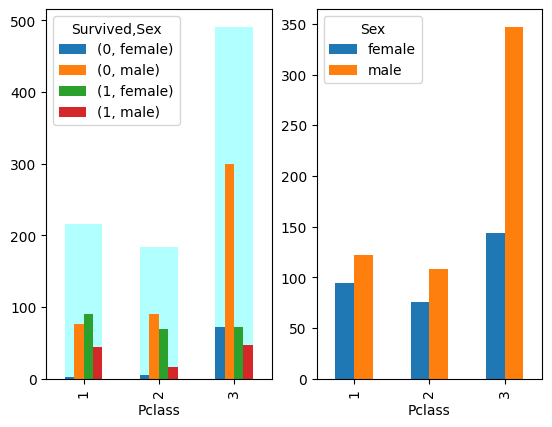

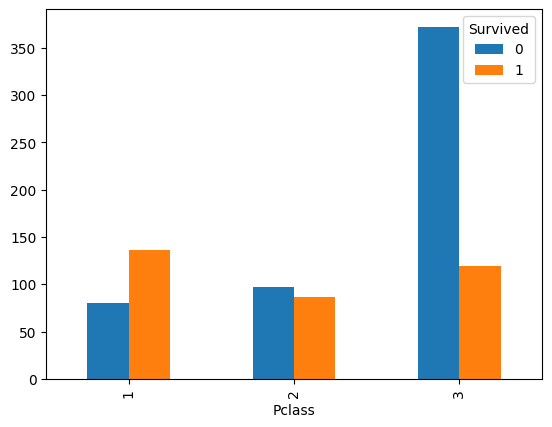

In [26]:
classes_survived = df.groupby(['Pclass', 'Survived']).size().to_frame('count')

#df.groupby(['Pclass', 'Survived']).size().unstack().plot.bar()

fig, axes = plt.subplots(nrows=1, ncols=2)
#first subplot contains the total population in each class, making this transparent to overlap the separated populations
df.groupby(['Pclass']).size().plot(ax=axes[0], alpha=0.3, color='cyan', kind='bar');
df.groupby(['Pclass', 'Sex']).size().unstack().plot(ax=axes[1], kind='bar')




classes_survived_sex = df.groupby(['Pclass', 'Sex', 'Survived']).size().to_frame('count')

unstacked_classes_survived_sex = classes_survived_sex.unstack()

df_pivot = pd.pivot_table(unstacked_classes_survived_sex,
                          observed=False,
                         values="count",
                         index="Pclass",
                         columns="Sex",
                         aggfunc=np.mean)

df_pivot.plot(ax=axes[0], kind='bar')

df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar')

In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

The 3rd (lowest) class had the largest population on the ship, and yet it still has less surviving passengers in total than the first class as seen in the 3rd graph. However, it is important to notice that the 3rd class also had over double the number of men compared to women. 

As we have seen previously, men had a lower survival rate than women likely due to prioritizing the women and children. As a result, the 3rd class incurred a bigger loss as it is largely made up of male passengers. In the first graph, we can see that more women survived than men, and more women survived than the number of women who did not survive in the 3rd class. 

However, if we look at the 1st and second 2nd, the number of women who did not survive was negligible compared to the almost 100 women in the 3rd class who didn't survive, when the number of women aboard the ship in each class ranged between 90-150 per class. This suggests that women in the 3rd class were less likely to be prioritized compared to the women in the 1st and 2nd classes.

The proportion of male passengers in the first class who did survive was approximately a third of the 1st class male population, meanwhile the proportion of men who survived in the 2nd and 3rd classes was extremely low compared to their respective population sizes.

In summary, males in the first class appeared to be given priority compared to males in the 2nd and 3rd classes, however women in the 1st and 2nd classes had a higher rate of survival than the women in the 3rd class.
There appears to be a trend whereby the higher classes had priority for lifeboats.

In [ ]:
classes_by_age = df.groupby(['Age_group', 'Pclass', 'Survived']).size().to_frame('count')

unstacked_classes_by_age = classes_by_age.unstack()

df_pivot = pd.pivot_table(unstacked_classes_by_age,
                          observed=False,
                         values="count",
                         index="Age_group",
                         columns="Sex",
                         aggfunc=np.mean)

df_pivot.plot.bar()

C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\54505366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  classes_by_age = df_ages.groupby(['Age_group', 'Pclass']).size().to_frame('count')
C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\54505366.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot_cba = pd.pivot_table(classes_by_age,
C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\54505366.py:4: FutureWarning: The provided callable <function mean at 0x0000026B64B78220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the stri

<Axes: xlabel='Pclass'>

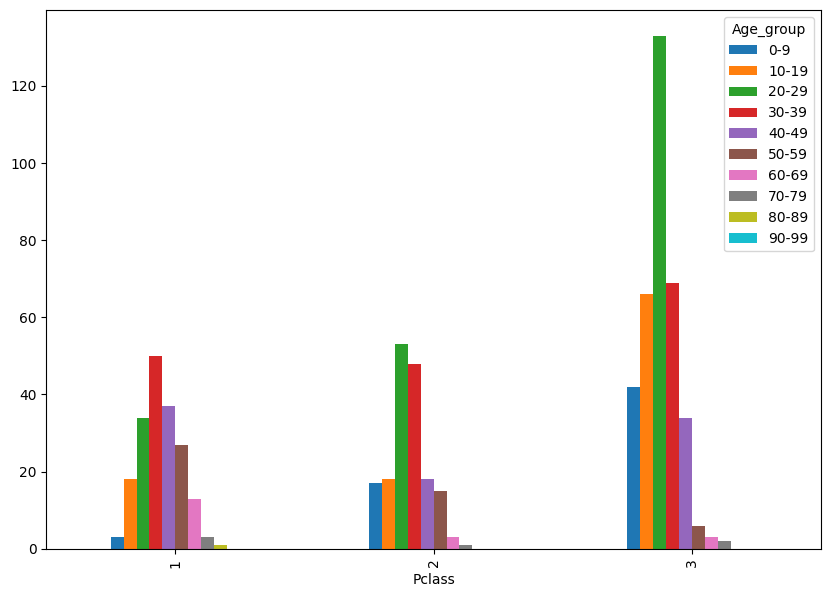

In [52]:
classes_by_age = df_ages.groupby(['Age_group', 'Pclass']).size().to_frame('count')
#classes_by_age.head()

df_pivot_cba = pd.pivot_table(classes_by_age,
                         values="count",
                         index="Pclass",
                         columns="Age_group",
                         aggfunc=np.mean)

df_pivot_cba.plot.bar(figsize=(10,7))

Extra Observation

The first class appeared to have priority for lifeboats, but this class had the least children. The most prominent age groups in the first class were made up of 30-49 year old passengers, followed up by 20-29 and yet more first class passengers survived than not survive (as seen in a previous graph) rather than giving priority to children in other classes on the titanic



C:\Users\kgarb\AppData\Local\Temp\ipykernel_5348\2435428861.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  firstclass_ages_survived = df_firstclass.groupby(['Age_group', 'Survived']).size()#.to_frame('count')


<Axes: xlabel='Age_group'>

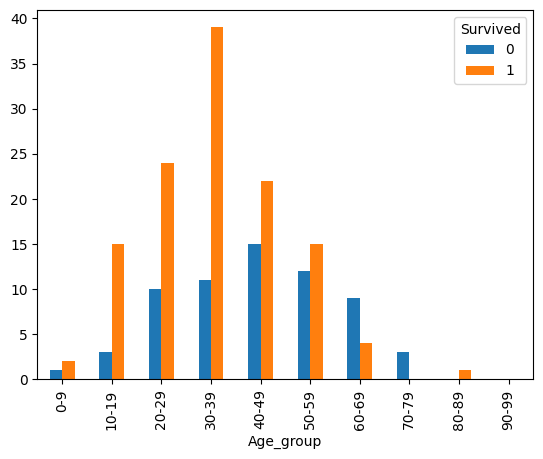

In [54]:
df_firstclass = df_ages.loc[df['Pclass'] == 1]
#df_firstclass.head()
firstclass_ages_survived = df_firstclass.groupby(['Age_group', 'Survived']).size()#.to_frame('count')
firstclass_ages_survived.unstack().plot.bar()

In the first class, your age did not seem to affect your odds of survival as much, as the number of survivors in each category outweighed the number of non-survivors, with the exception of the elderly (60+)


My extra observation is that being in the first class appears to outweigh the general trends of survival in the lower classes, where there tend to be less survivors in each age group than non-survivors, particularly among men.